In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [148]:
df = pd.read_csv('TCS.csv')
# df
df2 = pd.read_csv("BAJFINANCE.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,156.000000,161.500000,153.009995,155.404999,149.794449,1404850
1,2014-01-08,156.074997,157.179993,153.699997,155.304993,149.698029,894050
2,2014-01-15,155.399994,160.399994,153.199997,159.684998,153.919907,1391780
3,2014-01-22,160.100006,161.000000,147.199997,153.574997,148.030472,756230
4,2014-01-29,154.500000,155.865005,147.500000,148.130005,142.782059,771570


In [149]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,46.869999,46.869999,41.779999,45.790001,42.803696,4824700
1,2014-01-08,41.230000,41.500000,36.500000,38.180000,35.690002,10139200
2,2014-01-15,38.759998,39.970001,37.750000,38.430000,35.923698,1911800
3,2014-01-22,38.500000,38.750000,36.110001,36.490002,34.110218,1856900
4,2014-01-29,36.139999,37.480000,34.230000,36.750000,34.353260,2748200


In [150]:
list_of_stocks = ['BAJFINANCE.csv', 'BPCL.NS.csv', 'HDB.csv', 'INFY.csv', 'KOTAKBANK.NS.csv',
                  'TATASTEEL.NS.csv','TCS.csv', 'TTNP.csv', 'WIT.csv']
stocks = {i:pd.read_csv(j) for i, j in enumerate(list_of_stocks)}
stocks[0].tail()

,Date,Open,High,Low,Close,Adj Close,Volume
517,2023-11-29,7134.000000,7440.000000,7085.649902,7349.799805,7349.799805,5478509
518,2023-12-06,7390.000000,7459.000000,7270.049805,7314.549805,7314.549805,3738417
519,2023-12-13,7299.850098,7641.600098,7207.000000,7632.649902,7632.649902,5460666
520,2023-12-20,7650.000000,7695.000000,7145.250000,7162.299805,7162.299805,4142957
521,2023-12-27,7219.899902,7343.000000,7190.899902,7299.049805,7299.049805,4705634


In [151]:
for i in stocks:
    stocks[i]=stocks[i].drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

### Function to find returns

In [152]:
def R(price_col):
    first_row = [0]
    for i in range(1, len(price_col)):
        first_row.append(((price_col[i]-price_col[i-1])/(price_col[i-1]))*100)
    return np.array(first_row).round(2)

In [153]:
stocks[0]

,Date,Close
0,2014-01-01,155.404999
1,2014-01-08,155.304993
2,2014-01-15,159.684998
3,2014-01-22,153.574997
4,2014-01-29,148.130005
...,...,...
517,2023-11-29,7349.799805
518,2023-12-06,7314.549805
519,2023-12-13,7632.649902
520,2023-12-20,7162.299805


In [154]:
for i in stocks:
    stocks[i][f'R({i})'] = R(stocks[i].iloc[:, 1])

## Creating Portfolio Class which consists of all utitity functionalities

In [222]:
class Portfolio:
    def __init__(self, *stocks):
        self.stocks = {i:j for i, j in enumerate(stocks)}
            
#         within stocks we expect an array of df
        
        self.no_of_stocks = len(self.stocks)
        
    def getAllWeights(self):
        weight_options = range(0, 101, 5)
        combinations = [combo for combo in itertools.product(weight_options, repeat=len(self.stocks)) if sum(combo) == 100]
        return combinations
    
    
    
    def getPortReturn(self, *weights):
        avg = []
        for i in self.stocks:
            avg.append(self.stocks[i].iloc[:, -1].mean())
        avg = np.array(avg)
        weights = np.array(weights)[0]
        return np.dot(avg, weights/100).round(5)
    
    
    
    
    def getPortStd(self, *weights):
        stocks_returns = []
        for i in self.stocks:
            stocks_returns.append(self.stocks[i].iloc[:, -1])
        stocks_returns = np.array(stocks_returns)
        df = pd.DataFrame(stocks_returns.T)
        l = []
        weights = np.array(weights)[0]
        for i in df.index:
            l.append(np.dot(df.iloc[i, :],np.array(weights)/100))
        df['Portfolio(R)'] = l
        return df.iloc[:, -1].std()
        
# reliance = pd.read_csv("RELIANCE-Copy1.csv")
# adani = pd.read_csv("ADANIENT-Copy1.csv")
# reliance = reliance.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
# adani=adani.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
# reliance['R(R)'] = R(reliance.iloc[:, -1])
# adani['R(A)'] = R(adani.iloc[:, -1])
# p1 = Portfolio(reliance, adani)
# p1.getPortStd(50, 50)


In [223]:
port1 = Portfolio(stocks[0], stocks[1], stocks[2])
s = port1.getPortStd((50, 40, 10))
s

4.017501990255917

In [224]:
port1.getPortReturn((50, 40, 10))

0.63099

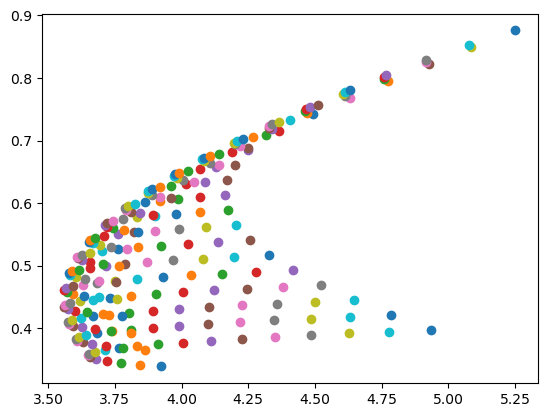

In [225]:
for i in port1.getAllWeights():
    plt.scatter(port1.getPortStd(i), port1.getPortReturn(i))
plt.show()